In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
np.object = np.object_
np.bool = np.bool_
np.int = int

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
# Load the cleaned data
df = pd.read_csv('cartItemsWithRating.csv')

In [6]:
df

,product_name,product_id,category_id,category,_id,status,is_order,is_payed,url_key,sku_from_system,...,store_name,cart_id,added_by,customer_id,user_id,brand_id,brand,product_url_key,product_description,rating
0,Propods P9 Wireless Gaming Headphones Ipx47,632adeebe387a0ccbd419f38,638590305a556431bf362c0a,1000 Ma Bazar,6369f4c9718f5cbc4c0eaab0,removed,False,False,propods-p9-wireless-gaming-headphones-ipx47,1378_105926346_NP-1027832760,...,Rk Jha Traders,6369f4c9718f5cbc4c0eaaaf,63295a1878f932890ebe7f33,63295a1878f932890ebe7f33,63295a1878f932890ebe7f33,5e2aa5e3bc8d203bec624d50,Not Applicable,propods-p9-wireless-gaming-headphones-ipx47,"<ul>\n\t<li data-spm-anchor-id=""a2a0e.pdp.prod...",3.0
1,Propods P9 Wireless Gaming Headphones Ipx47,632adeebe387a0ccbd419f38,638590305a556431bf362c0a,1000 Ma Bazar,636b55797e71f1fa8bd736b6,removed,False,False,propods-p9-wireless-gaming-headphones-ipx47,1378_105926346_NP-1027832760,...,Rk Jha Traders,636b55797e71f1fa8bd736b5,636b4ffd7e71f1fa8bd7356f,636b4ffd7e71f1fa8bd7356f,636b4ffd7e71f1fa8bd7356f,5e2aa5e3bc8d203bec624d50,Not Applicable,propods-p9-wireless-gaming-headphones-ipx47,"<ul>\n\t<li data-spm-anchor-id=""a2a0e.pdp.prod...",1.5
2,Propods P9 Wireless Gaming Headphones Ipx47,632adeebe387a0ccbd419f38,638590305a556431bf362c0a,1000 Ma Bazar,636ccaa7804ab22b48e0af07,removed,False,False,propods-p9-wireless-gaming-headphones-ipx47,1378_105926346_NP-1027832760,...,Rk Jha Traders,636ccaa7804ab22b48e0af06,6360e6483435d7cd920cdf24,6360e6483435d7cd920cdf24,6360e6483435d7cd920cdf24,5e2aa5e3bc8d203bec624d50,Not Applicable,propods-p9-wireless-gaming-headphones-ipx47,"<ul>\n\t<li data-spm-anchor-id=""a2a0e.pdp.prod...",1.5
3,Propods P9 Wireless Gaming Headphones Ipx47,632adeebe387a0ccbd419f38,638590305a556431bf362c0a,1000 Ma Bazar,636cdfeea5c31a2b645f6cc3,removed,False,False,propods-p9-wireless-gaming-headphones-ipx47,1378_105926346_NP-1027832760,...,Rk Jha Traders,636cdfeea5c31a2b645f6cc2,636cdf34804ab22b48e0b24c,636cdf34804ab22b48e0b24c,636cdf34804ab22b48e0b24c,5e2aa5e3bc8d203bec624d50,Not Applicable,propods-p9-wireless-gaming-headphones-ipx47,"<ul>\n\t<li data-spm-anchor-id=""a2a0e.pdp.prod...",2.5
4,Propods P9 Wireless Gaming Headphones Ipx47,632adeebe387a0ccbd419f38,638590305a556431bf362c0a,1000 Ma Bazar,636f07e31a01845aedc57ebb,removed,False,False,propods-p9-wireless-gaming-headphones-ipx47,1378_105926346_NP-1027832760,...,Rk Jha Traders,636f07d85458785af3fd9a9c,636f05e45458785af3fd9a78,636f05e45458785af3fd9a78,636f05e45458785af3fd9a78,5e2aa5e3bc8d203bec624d50,Not Applicable,propods-p9-wireless-gaming-headphones-ipx47,"<ul>\n\t<li data-spm-anchor-id=""a2a0e.pdp.prod...",2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663128,Barbie Bash Cake,5efad502ffc2a23ef854c288,5ef9ba85ffc2a23ef854a473,Cakes,608e794f27181703b5846eed,delivered,True,True,barbie-bash-cake,304_HC-B-31,...,Oho Cakes,607bfbcd28e4fd1f54fe4ee2,6076891500dfc2127dd65e12,6076891500dfc2127dd65e12,6076891500dfc2127dd65e12,5ef9db6effc2a23ef854b121,Oho Cake,barbie-bash-cake,<ul>\n\t<li>Pound 3 Pound</li>\n\t<li><strong>...,2.0
663129,Jeevan Jiune Kaida,5ef98fabffc2a23ef854950a,5ea9573765382e2f086c4cdb,Books,6097aa9c609139ec388b7a8c,delivered,True,True,jeevan-jiune-kaida,305_978-9937-8924-5-2,...,NEPALAYA,60979da2cf6664dd0319687e,60910407d462bf741b5c1569,60910407d462bf741b5c1569,60910407d462bf741b5c1569,5e2aa5e3bc8d203bec624d50,Not Applicable,jeevan-jiune-kaida,<ul>\n\t<li>Author: Jeevan Kumar Prasain</li>\...,1.5
663130,Palpasa Cafe Nepali,5ef98ef3ffc2a23ef85494fb,5eaa64de1b450532f9891eae,Books,60b33e5131642bf58d520d1e,delivered,True,True,palpasa-cafe-nepali,305_978-9937-9058-5-5,...,NEPALAYA,60b33dbf1487eff5642af542,NaN,NaN,NaN,5e2aa5e3bc8d203bec624d50,Not Applicable,palpasa-cafe-nepali,<ul>\n\t<li>Author: Narayan Wagle</li>\n\t<li>...,2.5
663131,Rookmangud Katawal (Nepali),5ef999adffc2a23ef854968b,5ea953fe65382e2f086c4ca1,Books,608bc0090fb8a98c32413fea,delivered,True,True,rookmangud-katawal-nepali,

In [12]:
# Encode product IDs
product_encoder = LabelEncoder()
df['product_id_encoded'] = product_encoder.fit_transform(df['product_id'])

# Encode user IDs
user_encoder = LabelEncoder()
df['customer_id_encoded'] = user_encoder.fit_transform(df['customer_id'])

In [13]:
# Create sequences of user interactions
def create_sequences(df, user_col, item_col, seq_length=5):
    sequences = []
    labels = []
    
    for user_id, group in df.groupby(user_col):
        items = group[item_col].tolist()
        if len(items) < seq_length:
            continue
        for i in range(len(items) - seq_length):
            sequences.append(items[i:i+seq_length])
            labels.append(items[i+seq_length])
    
    return np.array(sequences), np.array(labels)

In [14]:
seq_length = 5
X, y = create_sequences(df, 'customer_id_encoded', 'product_id_encoded', seq_length)
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
import tensorflow as tf

### LSTM Model

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

def build_lstm_model(vocab_size, embed_dim, seq_length):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=seq_length))
    model.add(LSTM(units=64, return_sequences=False))
    model.add(Dense(units=vocab_size, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

vocab_size = len(product_encoder.classes_)
embed_dim = 50
lstm_model = build_lstm_model(vocab_size, embed_dim, seq_length)
lstm_model.summary()

# Train the LSTM model
history_lstm = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5, 50)             1706050   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 34121)             2217865   
Total params: 3,953,355
Trainable params: 3,953,355
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
10213/10213 [==============================] - 56s 5ms/step - loss: 5.6849 - accuracy: 0.3420 - val_loss: 4.4373 - val_accuracy: 0.4941
Epoch 2/10
10213/10213 [==============================] - 49s 5ms/step - loss: 3.7969 - accuracy: 0.5490 - val_loss: 3.8832 - val_accuracy: 0.5744
Epoch 3/10
10213/10213 [==============================] - 48s 5ms/step - loss: 3.1

### GRU Model

In [11]:
from tensorflow.keras.layers import GRU

def build_gru_model(vocab_size, embed_dim, seq_length):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=seq_length))
    model.add(GRU(units=64, return_sequences=False))
    model.add(Dense(units=vocab_size, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

gru_model = build_gru_model(vocab_size, embed_dim, seq_length)
gru_model.summary()

# Train the GRU model
history_gru = gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5, 50)             1706050   
_________________________________________________________________
gru (GRU)                    (None, 64)                22272     
_________________________________________________________________
dense_1 (Dense)              (None, 34121)             2217865   
Total params: 3,946,187
Trainable params: 3,946,187
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
10213/10213 [==============================] - 49s 5ms/step - loss: 5.7145 - accuracy: 0.3295 - val_loss: 4.3141 - val_accuracy: 0.5231
Epoch 2/10
10213/10213 [==============================] - 47s 5ms/step - loss: 3.7042 - accuracy: 0.5696 - val_loss: 3.8510 - val_accuracy: 0.5870
Epoch 3/10
10213/10213 [==============================] - 47s 5ms/step - loss: 3

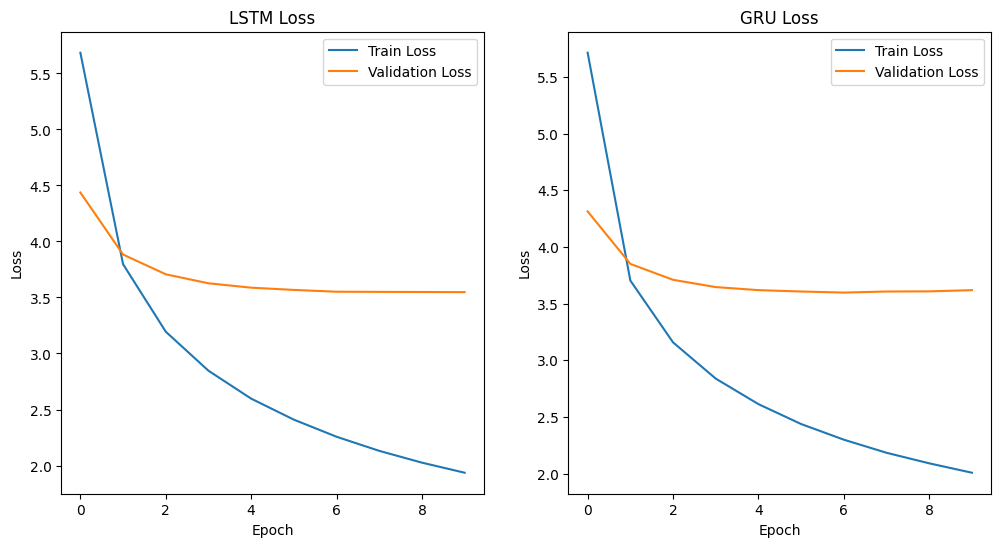

In [12]:
import matplotlib.pyplot as plt

# Plot training and validation loss for LSTM
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation loss for GRU
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('GRU Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


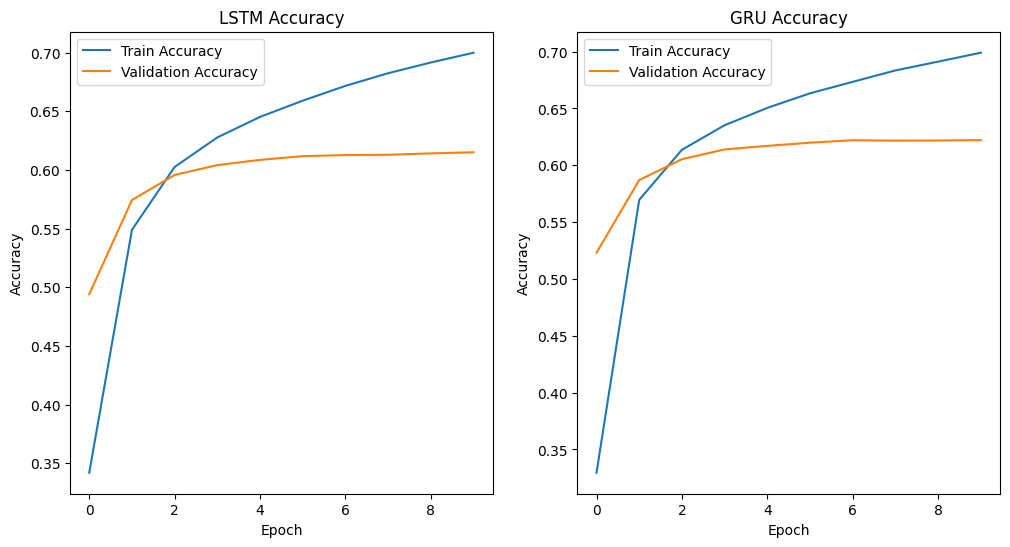

In [13]:
import matplotlib.pyplot as plt

# Plot training and validation loss for LSTM
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss for GRU
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['accuracy'], label='Train Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='Validation Accuracy')
plt.title('GRU Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [19]:
from tensorflow.keras.models import save_model

gru_model.save('recommendationModel.keras')

In [133]:
pip install tensorflow.python.trackable

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow.python.trackable (from versions: none)
ERROR: No matching distribution found for tensorflow.python.trackable


### tuner

In [ ]:
import keras_tuner as kt

In [ ]:
def build_gru_model(vocab_size, embed_dim, seq_length):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=seq_length))
    model.add(GRU(units=64, return_sequences=False))
    model.add(Dense(units=vocab_size, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

gru_model = build_gru_model(vocab_size, embed_dim, seq_length)

gru_tuner = gru_tuner = kt.RandomSearch(
    gru_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=2,
    directory='gru_tuner',
    project_name='gru_recommendation'
)

# For GRU
gru_tuner.search(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

In [ ]:
def build_lstm_model(vocab_size, embed_dim, seq_length):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=seq_length))
    model.add(LSTM(units=64, return_sequences=False))
    model.add(Dense(units=vocab_size, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

vocab_size = len(product_encoder.classes_)
embed_dim = 50
lstm_model = build_lstm_model(vocab_size, embed_dim, seq_length)

lstm_tuner = gru_tuner = kt.RandomSearch(
    lstm_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=2,
    directory='lstm_tuner',
    project_name='lstm_recommendation'
)

# For LSTM
lstm_tuner.search(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

### Evaluation

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
from tensorflow.keras import backend as K
K.clear_session()

In [20]:
lstm_model_evaluation = lstm_model.evaluate(X_test, y_test)
print("Evaluation results:", lstm_model_evaluation)

InternalError: stream did not block host until done; was already in an error state

In [18]:
# Evaluate the best LSTM model
# lstm_model_evaluation = lstm_model.evaluate(X_test, y_test)

# Make predictions on the test data
y_pred_lstm = lstm_model.predict(X_test)

# Convert predictions to class labels
y_pred_labels_lstm = np.argmax(y_pred_lstm, axis=1)

# Convert one-hot encoded labels to class labels
y_true_labels = np.argmax(y_test, axis=1)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels_lstm)

InternalError: stream did not block host until done; was already in an error state

### Recommendation Code

In [10]:
recomm_model = tf.keras.models.load_model('recommendationModel.keras')

In [21]:
def generate_recommendation_no_history(model, user_id, user_encoder, product_encoder, seq_length, top_n=5):
    """
    Generate top N product recommendations for a user without recent interaction history.

    Parameters:
    - model: Trained LSTM or GRU model.
    - user_id: The ID of the user for whom to generate recommendations.
    - user_encoder: Encoder used to transform user IDs.
    - product_encoder: Encoder used to transform product IDs.
    - seq_length: The sequence length used in model training.
    - top_n: Number of top recommendations to return.

    Returns:
    - List of top N recommended product IDs.
    """

    # Encode the user_id
    user_encoded = user_encoder.transform([user_id])

    # Create an empty sequence with just the user ID
    user_sequence = np.pad(user_encoded, (seq_length - len(user_encoded), 0), 'constant')
    
    # Reshape for model input
    user_sequence = user_sequence.reshape(1, seq_length)

    # Predict the next product
    predictions = model.predict(user_sequence)

    # Get the top N product indices
    top_n_indices = predictions.argsort()[0, -top_n:][::-1]

    # Decode the indices back to product IDs
    recommended_products = product_encoder.inverse_transform(top_n_indices)
    
    return recommended_products.tolist()

# Example usage
user_id = '63295a1878f932890ebe7f33'  # Replace with a real user ID

# Assume seq_length is the sequence length used in training, such as 5
seq_length = 5

# Generate recommendations
recommended_products = generate_recommendation_no_history(lstm_model, user_id, user_encoder, product_encoder, seq_length, top_n=5)

print("Top 5 product recommendations:", recommended_products)


InternalError: stream did not block host until done; was already in an error state

In [25]:
def generate_recommendation_no_history(model, user_id, user_encoder, product_encoder, seq_length, top_n=5):
    """
    Generate top N product recommendations for a user without recent interaction history.

    Parameters:
    - model: Trained LSTM or GRU model.
    - user_id: The ID of the user for whom to generate recommendations.
    - user_encoder: Encoder used to transform user IDs.
    - product_encoder: Encoder used to transform product IDs.
    - seq_length: The sequence length used in model training.
    - top_n: Number of top recommendations to return.

    Returns:
    - List of top N recommended product IDs.
    """

    # Encode the user_id
    user_encoded = user_encoder.transform([user_id])

    # Create an empty sequence with just the user ID
    user_sequence = np.pad(user_encoded, (seq_length - len(user_encoded), 0), 'constant')
    
    # Reshape for model input
    user_sequence = user_sequence.reshape(1, seq_length)

    # Predict the next product
    predictions = model.predict(user_sequence)

    # Get the top N product indices
    top_n_indices = predictions.argsort()[0, -top_n:][::-1]

    # Decode the indices back to product IDs
    recommended_products = product_encoder.inverse_transform(top_n_indices)
    
    return recommended_products.tolist()

# Example usage
user_id = '63295a1878f932890ebe7f33'  # Replace with a real user ID

# Assume seq_length is the sequence length used in training, such as 5
seq_length = 5

# Generate recommendations
recommended_products = generate_recommendation_no_history(lstm_model, user_id, user_encoder, product_encoder, seq_length, top_n=5)

print("Top 5 product recommendations:", recommended_products)


Top 5 product recommendations: ['61dd1a7956b1cc02904423c0', '60a0e962f33020b1ae2c9234', '5feb22445ddc636b302e6f6f', '63045fd4c8fab7ff645b754e', '5e688cca7f1e0a4da1c073e9']


In [16]:
def generate_recommendation_no_history(model, user_id, user_encoder, product_encoder, seq_length, top_n=50):
    """
    Generate top N product recommendations for a user without recent interaction history.

    Parameters:
    - model: Trained LSTM or GRU model.
    - user_id: The ID of the user for whom to generate recommendations.
    - user_encoder: Encoder used to transform user IDs.
    - product_encoder: Encoder used to transform product IDs.
    - seq_length: The sequence length used in model training.
    - top_n: Number of top recommendations to return.

    Returns:
    - List of top N recommended product IDs.
    """

    # Encode the user_id
    user_encoded = user_encoder.transform([user_id])

    # Create an empty sequence with just the user ID
    user_sequence = np.pad(user_encoded, (seq_length - len(user_encoded), 0), 'constant')
    
    # Reshape for model input
    user_sequence = user_sequence.reshape(1, seq_length)

    # Predict the next product
    predictions = model.predict(user_sequence)

    # Get the top N product indices
    top_n_indices = predictions.argsort()[0, -top_n:][::-1]

    # Decode the indices back to product IDs
    recommended_products = product_encoder.inverse_transform(top_n_indices)
    
    return recommended_products.tolist()

# Example usage
user_id = '62b5387f7ae3ece2d8699839'  # Replace with a real user ID

# Assume seq_length is the sequence length used in training, such as 5
seq_length = 5

# Generate recommendations
recommended_products = generate_recommendation_no_history(recomm_model, user_id, user_encoder, product_encoder, seq_length, top_n=50)

print("Top 5 product recommendations:", recommended_products)


Top 5 product recommendations: ['60f9569dbdee5a25d66129af', '5e67890c7f1e0a4da1c06c2a', '6364bcba50d8fc9510f2d719', '5ff19b80bd34ed6b2ac80243', '5ee89ae59ed9101c9dfa0222', '6094d33599894e51deb495ed', '6363aad229e7e33ac6ea5cf2', '5eb7dbde8a63de0eb613c36b', '5ee8b5689ed9101c9dfa0383', '5ee8aa269ed9101c9dfa027e', '5f7c1355ea2ed65dbf1899e7', '626f6aab322831b3a87fa5f4', '62fb285bb01131a0c8d378e1', '60fede77e61a8783dfb2f372', '5f02bd4d6bc1c84657e16d3f', '5faacb587721ea307a61ffa0', '5f100c8945aa8629eaccb7af', '5e6891db7f1e0a4da1c074a1', '603cb6ae44eb0c4d7b6dd474', '608bc77e0fb8a98c3241409c', '5f12c5d45372703195ccf477', '60936f2d0a851802f5b0eb58', '5f670b9dea2ed65dbf170179', '5f895b676a586f1d51eb6d79', '5f69d505ea2ed65dbf1723ce', '60827313fb5c17cdca61202c', '610bb4397180a5454086ad05', '62f0bde823d1226633901b5d', '61fa12311d2c81e47a756161', '60e1bcbc3cd7ec4d52180eb6', '5f0ef5bdec3f45130ce2ff54', '5faa82487721ea307a61ed21', '5f8564eaea2ed65dbf1941e0', '60e56345ea53972d9172298f', '5ff2ebe82093d45

In [12]:
gru_model_evaliation = recomm_model.evaluate(X_test, y_test)

3192/3192 [==============================] - 8s 2ms/step - loss: 3.5956 - accuracy: 0.6233


In [13]:
# Evaluate the best LSTM model
gru_model_evaliation = recomm_model.evaluate(X_test, y_test)

# Make predictions on the test data
y_pred_gru = recomm_model.predict(X_test)

# Convert predictions to class labels
y_pred_labels_gru = np.argmax(y_pred_lstm, axis=1)

# Convert one-hot encoded labels to class labels
y_true_labels = np.argmax(y_test, axis=1)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels_lstm)

3192/3192 [==============================] - 8s 3ms/step - loss: 3.5956 - accuracy: 0.6233


InternalError:    Failed to call ThenRnnForward with model config: [rnn_mode, rnn_input_mode, rnn_direction_mode]: 3, 0, 0 , [num_layers, input_size, num_units, dir_count, max_seq_length, batch_size, cell_num_units]: [1, 50, 64, 1, 5, 32, 0] 
	 [[{{node CudnnRNN}}]]
	 [[sequential_1/gru/PartitionedCall]] [Op:__inference_predict_function_1052]

Function call stack:
predict_function -> predict_function -> predict_function


### Creating API

In [119]:
from fastapi import FastAPI, Request
import uvicorn
import asyncio

In [120]:
app = FastAPI()

In [121]:
@app.get("/")
async def root():
    return {"message": "Hello World"}

In [122]:
@app.get("/recommendation/")
async def recommendation(user_id, page: int = 1 , limit: int = 10):
    try:
        # _query = await query.json()
        recommendations = generate_recommendation_no_history(recomm_model, user_id, user_encoder, product_encoder, seq_length, 50)
        recommendations = recommendations[(page-1)*limit: (page*limit)]
        return {"recommendations":recommendations , "success": True}
    except:
        return {"success": False}
    

In [123]:
# server start
if __name__ == "__main__":
    config = uvicorn.Config(app)
    server = uvicorn.Server(config)
    await server.serve()

INFO:     Started server process [16652]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:63592 - "GET /recommendation?user_id=62b5387f7ae3ece2d8699839page=1limit=12 HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:63593 - "GET /recommendation/?user_id=62b5387f7ae3ece2d8699839page=1limit=12 HTTP/1.1" 200 OK
INFO:     127.0.0.1:63595 - "GET /recommendation?user_id=62b5387f7ae3ece2d8699839page=1limit=12 HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:63596 - "GET /recommendation/?user_id=62b5387f7ae3ece2d8699839page=1limit=12 HTTP/1.1" 200 OK
INFO:     127.0.0.1:63703 - "GET /recommendation?user_id=62b5387f7ae3ece2d8699839&page=1&limit=12 HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:63704 - "GET /recommendation/?user_id=62b5387f7ae3ece2d8699839&page=1&limit=12 HTTP/1.1" 200 OK
INFO:     127.0.0.1:63712 - "GET /recommendation?user_id=62b5387f7ae3ece2d8699839&page=1&limit=12 HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:63713 - "GET /recommendation/?user_id=62b5387f7ae3ece2d8699839&page=1&limit=12 HTTP/1.1" 200 OK
INFO:     127.0.0.1:

INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [16652]
